In [1]:
import matplotlib
import plotly.plotly as py
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import numpy as np
import plotly.graph_objs as go
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from plotly import tools
import plotly.plotly as py
%matplotlib inline

In [2]:
data=pd.read_csv("TER20.csv")

In [3]:
data.head(10)

id   fl_dur  fw_pk  l_fw_pkt  l_bw_pkt  pkt_len_min  pkt_len_max  \
0   1  3051361      4      2064         0          516          516   
1   2  2998184      4      2064         0          516          516   
2   3  3000004      4      2064         0          516          516   
3   4        1      2      1032         0          516          516   
4   5  3004376      4      2064         0          516          516   
5   6  3006529      4      2064         0          516          516   
6   7        2      2      1032         0          516          516   
7   8        2      2      1032         0          516          516   
8   9        1      2      1032         0          516          516   
9  10        1      2      1032         0          516          516   

   pkt_len_std      fl_byt_s  fl_iat_min   ...    down_up_ratio  \
0          0.0  6.764195e+02           0   ...                0   
1          0.0  6.884167e+02           1   ...                0   
2          0.0  6.879991e+02           1   ...                0   
3          0.0  1.032000e+09           1   ...                0   
4          0.0  6.869979e+02           1   ...                0   
5          0.0  6.865059e+02           1   ...                0   
6          0.0  5.160000e+08           2   ...                0   
7          0.0  5.160000e+08           2   ...                0   
8          0.0  1.032000e+09           1   ...                0   
9          0.0  1.032000e+09           1   ...                0   

   fw_byt_blk_avg  fw_pkt_blk_avg  fw_blk_rate_avg  bw_byt_blk_avg  \
0               0               0                0               0   
1               0               0                0               0   
2               0               0                0               0   
3               0               0                0               0   
4               0               0                0               0   
5               0               0                0               0   
6               0               0                0               0   
7               0               0                0               0   
8               0               0                0               0   
9               0               0                0               0   

   bw_pkt_blk_avg  bw_blk_rate_avg  fw_win_byt  bw_win_byt   Label  
0               0                0          -1          -1  Botnet  
1               0                0          -1          -1  Botnet  
2               0                0          -1          -1  Botnet  
3               0                0          -1          -1  Botnet  
4               0                0          -1          -1  Botnet  
5               0                0          -1          -1  Botnet  
6               0                0          -1          -1  Botnet  
7               0                0          -1          -1  Botnet  
8               0                0          -1          -1  Botnet  
9               0                0          -1          -1  Botnet  

[10 rows x 32 columns]

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82320 entries, 0 to 82319
Data columns (total 33 columns):
id                 82320 non-null int64
fl_dur             82320 non-null int64
fw_pk              82320 non-null int64
l_fw_pkt           82320 non-null int64
l_bw_pkt           82320 non-null int64
pkt_len_min        82320 non-null int64
pkt_len_max        82320 non-null int64
pkt_len_std        82320 non-null float64
fl_byt_s           82320 non-null float64
fl_iat_min         82320 non-null int64
bw_iat_tot         82320 non-null int64
bw_iat_min         82320 non-null int64
bw_psh_flag        82320 non-null int64
fw_urg_flag        82320 non-null int64
bw_urg_flag        82320 non-null int64
fw_hdr_len         82320 non-null int64
bw_pkt_s           82320 non-null float64
fin_cnt            82320 non-null int64
syn_cnt            82320 non-null int64
psh_cnt            82320 non-null int64
urg_cnt            82320 non-null int64
ece_cnt            82320 non-null int64
down_

Text(0, 0.5, 'Values count')

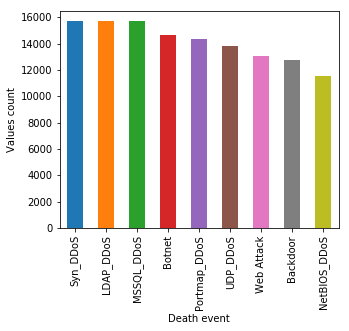

In [4]:
# multiple line plot
fig, ax = plt.subplots(figsize=(5,4))
#plt.rcParams['axes.labelweight'] = 'bold'
data['Label']= data[' Label']
data.Label.value_counts().plot(kind = 'bar',ax=ax)
plt.xlabel('Death event')
plt.ylabel('Values count')
#plt.savefig('nationality1.pdf')

In [6]:
#All Feature
from sklearn.preprocessing import LabelEncoder
drop_column=['Label',' Label']
X = data.drop(drop_column, axis=1)

#yoy = data['Event']
y = data['Label']
y = LabelEncoder().fit_transform(y)

In [34]:
#removing ID column too
from sklearn.preprocessing import LabelEncoder
drop_column=['Label',' Label', 'id']
X = data.drop(drop_column, axis=1)

#yoy = data['Event']
y = data['Label']
y = LabelEncoder().fit_transform(y)

In [28]:
#removing less significant columns
from sklearn.preprocessing import LabelEncoder
drop_column=[' Label','Label','id', 'syn_cnt','psh_cnt', 'urg_cnt', 'ece_cnt','fw_byt_blk_avg', 'fw_pkt_blk_avg', 'fw_blk_rate_avg',
       'bw_byt_blk_avg', 'bw_pkt_blk_avg', 'bw_blk_rate_avg','bw_psh_flag', 'fw_urg_flag', 'bw_urg_flag','pkt_len_std']
X = data.drop(drop_column, axis=1)

#yoy = data['Event']
y = data['Label']
y = LabelEncoder().fit_transform(y)

In [35]:
#Train Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=52)

Random Forest
99.96594540786923


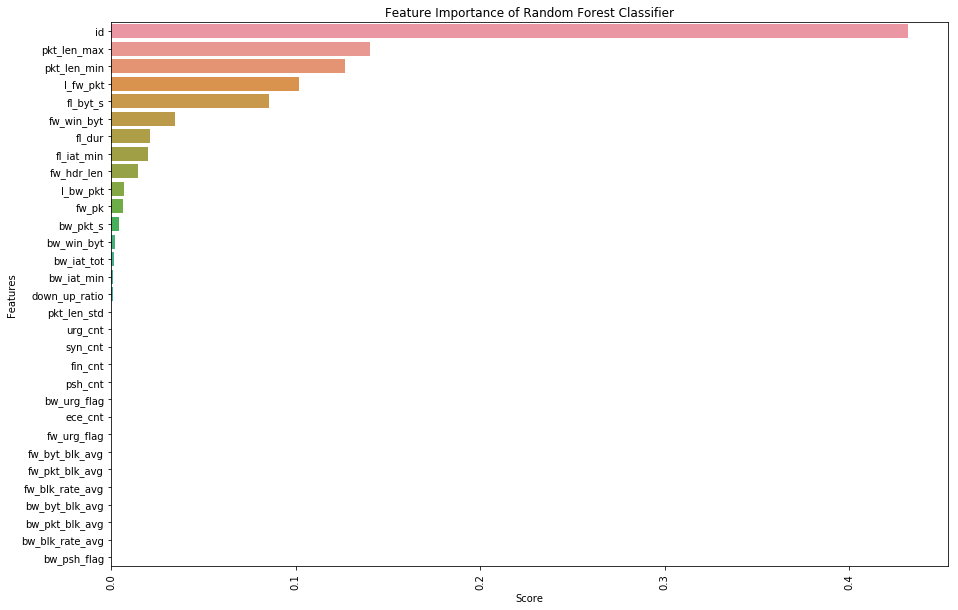

In [10]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
#All Features
from sklearn.model_selection import train_test_split
rfc = RandomForestClassifier(n_estimators=200, random_state=52)
pred = rfc.fit(X_train, y_train).predict(X_test)
print("Random Forest")
print(accuracy_score(y_test, pred)*100)
plt.figure(figsize=(15,10))
dn = {'features':X.columns, 'score':rfc.feature_importances_}
df = pd.DataFrame.from_dict(data=dn).sort_values(by='score', ascending=False)
plot = sns.barplot(x='score', y='features', data=df, orient='h')
plot.set(xlabel='Score', ylabel='Features', 
         title='Feature Importance of Random Forest Classifier')
plt.setp(plot.get_xticklabels(), rotation=90)
plt.savefig('All Features.pdf')
plt.show()


In [11]:
rfc.feature_importances_

array([4.32054802e-01, 2.08435757e-02, 6.26676075e-03, 1.01779171e-01,
       6.84814254e-03, 1.26822869e-01, 1.40365003e-01, 1.21472812e-05,
       8.56561939e-02, 1.99468848e-02, 1.77417504e-03, 1.10504269e-03,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.46520368e-02,
       4.08927234e-03, 0.00000000e+00, 3.26437409e-06, 0.00000000e+00,
       4.19569970e-06, 0.00000000e+00, 9.87758495e-04, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 3.44449999e-02, 2.34370474e-03])

In [12]:
data.columns

Index(['id', 'fl_dur', 'fw_pk', 'l_fw_pkt', 'l_bw_pkt', 'pkt_len_min',
       'pkt_len_max', 'pkt_len_std', 'fl_byt_s', 'fl_iat_min', 'bw_iat_tot',
       'bw_iat_min', 'bw_psh_flag', 'fw_urg_flag', 'bw_urg_flag', 'fw_hdr_len',
       'bw_pkt_s', 'fin_cnt', 'syn_cnt', 'psh_cnt', 'urg_cnt', 'ece_cnt',
       'down_up_ratio', 'fw_byt_blk_avg', 'fw_pkt_blk_avg', 'fw_blk_rate_avg',
       'bw_byt_blk_avg', 'bw_pkt_blk_avg', 'bw_blk_rate_avg', 'fw_win_byt',
       'bw_win_byt', ' Label', 'Label'],
      dtype='object')

In [36]:
score=[0.02049801, 0.0376158 , 0.03523146, 0.01533165, 0.0360122 ,
       0.01610212, 0.05275264, 0.01366314, 0.03161356, 0.15209729,
       0.19167799, 0.13677685, 0.08701766, 0.04242982, 0.02321972,
       0.1079601 ]
Chi_score=[3.845744324227531e-08,2.2782875738407628e-06,1.3131734018296024e-06,0.13485423396446766,0.048341443266402634,0.3079536942594841,0.0033248220968402657,0.02286743669274219,4.59970336036713e-18,1.5442296971798973e-21,0.0012026967714810885,9.885400678203716e-50,9.885400678203716e-50,1.0623054954920904e-15,1.7556791541055556e-17,9.885400678203716e-50]
labels=['Gender', 'Nationality', 'Place of birth', 'Stage id','Grade id','Section id', 'Topic', 'Semester','Relation', 'Raised hands','Visited resources', 'Announcements view','Discussion','Parent answering survey', 'Parent school satisfaction','Student absence days' ]

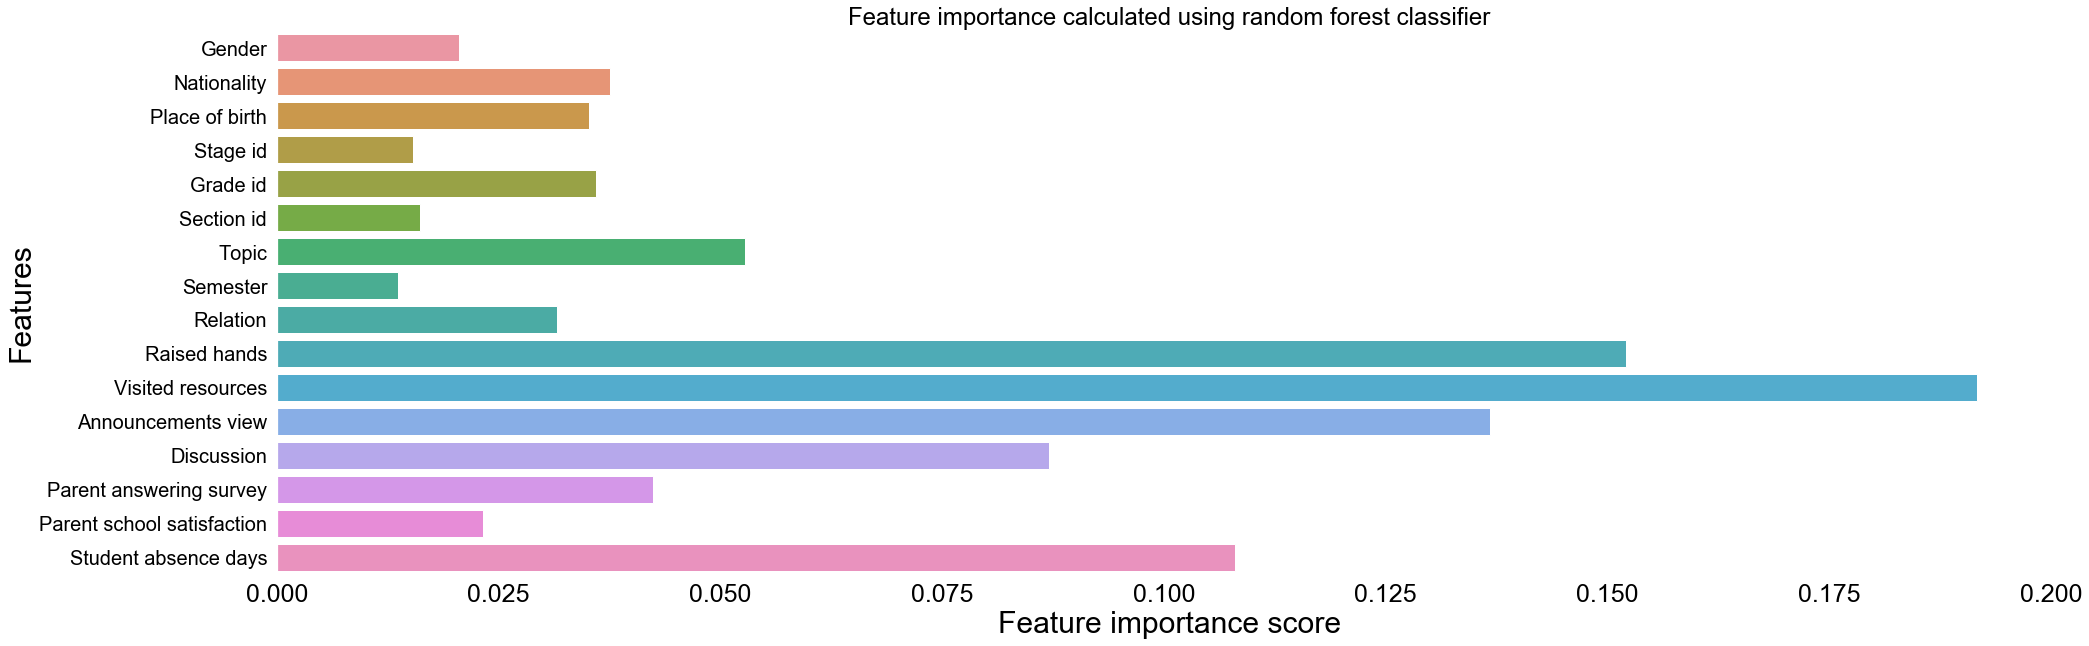

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt
bg_color = 'white'
sns.set(rc={"font.style":"normal",
            "axes.facecolor":bg_color,
            "figure.facecolor":bg_color,
            "text.color":"black",
            "xtick.color":"black",
            "ytick.color":"black",
            "axes.labelcolor":"black",
            "axes.grid":True,
            'axes.labelsize':30,
            'figure.figsize':(32.0, 10.0),
            'xtick.labelsize':25,
            'axes.titlesize' : 24,
            'font.size':20,
            'ytick.labelsize':20})
#tips = sns.load_dataset("tips")
ax = sns.barplot(x=score, y=labels)
ax.set(xlabel='Feature importance score', ylabel='Features')
ax.set_title("Feature importance calculated using random forest classifier")
ax.get_figure().savefig('fig_5.png')

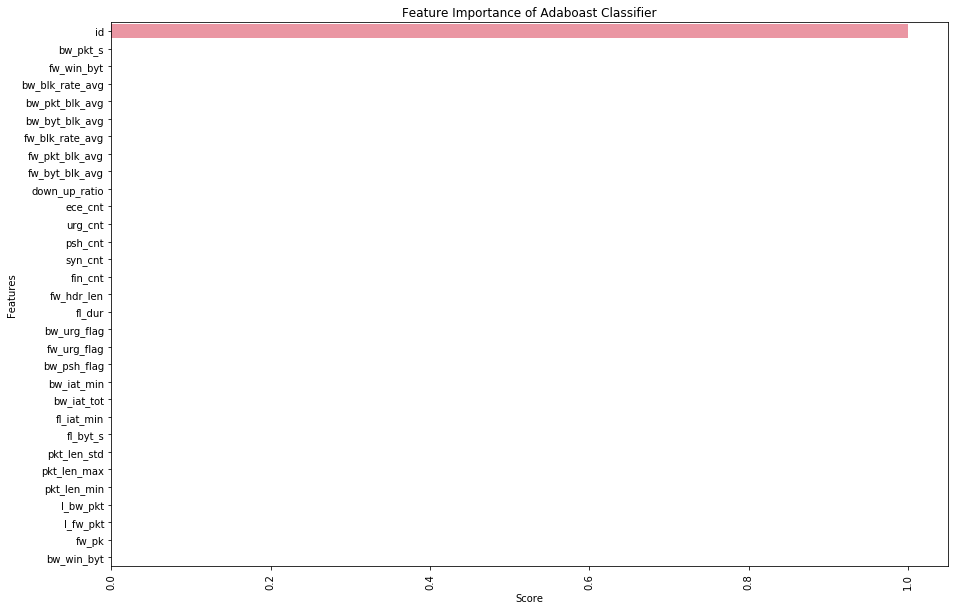

In [15]:
plt.figure(figsize=(15,10))
dn = {'features':X.columns, 'score':xgb.feature_importances_}
df = pd.DataFrame.from_dict(data=dn).sort_values(by='score', ascending=False)
plot = sns.barplot(x='score', y='features', data=df, orient='h')
plot.set(xlabel='Score', ylabel='Features', 
         title='Feature Importance of Adaboast Classifier')
plt.setp(plot.get_xticklabels(), rotation=90)
plt.savefig('All Features XGB.pdf')
plt.show()

In [13]:
#All models using All Features
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier
print("ADA")
xgb = AdaBoostClassifier(n_estimators=100, random_state=52)
xgb_pred = xgb.fit(X_train, y_train).predict(X_test)
print(accuracy_score(y_test,xgb_pred))
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,classification_report
dt = DecisionTreeClassifier(random_state=50)
print("Decision Tree Classifier Result")
DecisionTree=dt.fit(X_train, y_train).predict(X_test)
print(accuracy_score(y_test,DecisionTree))
from sklearn.svm import SVC
print("ETC")
b = ExtraTreesClassifier(n_estimators=100, random_state=52)
b_pred = b.fit(X_train, y_train).predict(X_test)
print(accuracy_score(y_test,b_pred))

from sklearn.naive_bayes import GaussianNB
print("Gaussian NB")
gnb = GaussianNB()
gnb_pred = gnb.fit(X_train, y_train).predict(X_test)
print(accuracy_score(y_test,gnb_pred))

from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
print("Logistic Regression Result")
logisticRegresion=lr.fit(X_train, y_train).predict(X_test)
print(accuracy_score(y_test,logisticRegresion))


#from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier
#from sklearn.linear_model import SGDClassifier
print("Voting Classifier LR+SGD")
clf2 = ExtraTreesClassifier(n_estimators=100, random_state=52)
clf1 = LogisticRegression()
eclf1 = VotingClassifier(estimators=[
        ('lr', clf1), ('ETC', clf2)],voting='hard')
predictionVC=eclf1.fit(X_train, y_train).predict(X_test)
print(accuracy_score(y_test,predictionVC))

ADA
0.6846282810289726
Decision Tree Classifier Result
0.9999738041598994
ETC
0.997301828469639
Gaussian NB
0.40600932571907583
Logistic Regression Result


C:\Users\Muhammad Umer\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

C:\Users\Muhammad Umer\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning:

Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.



0.46997956724472156
Voting Classifier LR+SGD


C:\Users\Muhammad Umer\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

C:\Users\Muhammad Umer\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning:

Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.



0.7724629328862577


In [14]:
#All Features
print("DT")
print(classification_report(y_test,DecisionTree))
print("GNB")
print(classification_report(y_test,gnb_pred))
print("ETC")
print(classification_report(y_test,b_pred))
print("RFC")
print(classification_report(y_test,pred))
print("XGB")
print(classification_report(y_test,xgb_pred))
print("LR")
print(classification_report(y_test,logisticRegresion))
print("Voting Classifier")
print(classification_report(y_test,predictionVC))

DT
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3731
           1       1.00      1.00      1.00      4350
           2       1.00      1.00      1.00      4814
           3       1.00      1.00      1.00      4591
           4       1.00      1.00      1.00      3493
           5       1.00      1.00      1.00      4346
           6       1.00      1.00      1.00      4792
           7       1.00      1.00      1.00      4134
           8       1.00      1.00      1.00      3923

    accuracy                           1.00     38174
   macro avg       1.00      1.00      1.00     38174
weighted avg       1.00      1.00      1.00     38174

GNB


C:\Users\Muhammad Umer\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.

C:\Users\Muhammad Umer\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.

C:\Users\Muhammad Umer\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.



              precision    recall  f1-score   support

           0       0.38      0.72      0.50      3731
           1       1.00      0.01      0.02      4350
           2       0.52      0.81      0.63      4814
           3       0.77      0.12      0.21      4591
           4       0.00      0.00      0.00      3493
           5       0.50      0.82      0.62      4346
           6       0.10      0.04      0.06      4792
           7       0.38      0.99      0.55      4134
           8       0.17      0.11      0.13      3923

    accuracy                           0.41     38174
   macro avg       0.42      0.40      0.30     38174
weighted avg       0.44      0.41      0.31     38174

ETC
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3731
           1       1.00      1.00      1.00      4350
           2       1.00      1.00      1.00      4814
           3       1.00      1.00      1.00      4591
           4       0

C:\Users\Muhammad Umer\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.

C:\Users\Muhammad Umer\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.

C:\Users\Muhammad Umer\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.

C:\Users\Muhammad Umer\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.



              precision    recall  f1-score   support

           0       0.00      0.00      0.00      3731
           1       1.00      1.00      1.00      4350
           2       0.00      0.00      0.00      4814
           3       0.28      1.00      0.43      4591
           4       0.00      0.00      0.00      3493
           5       1.00      1.00      1.00      4346
           6       1.00      1.00      1.00      4792
           7       1.00      1.00      1.00      4134
           8       1.00      1.00      1.00      3923

    accuracy                           0.68     38174
   macro avg       0.59      0.67      0.60     38174
weighted avg       0.60      0.68      0.62     38174

LR


C:\Users\Muhammad Umer\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.

C:\Users\Muhammad Umer\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.

C:\Users\Muhammad Umer\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.



              precision    recall  f1-score   support

           0       0.00      0.00      0.00      3731
           1       1.00      0.01      0.02      4350
           2       0.32      0.94      0.48      4814
           3       0.41      0.59      0.48      4591
           4       0.00      0.00      0.00      3493
           5       0.55      0.52      0.54      4346
           6       0.76      0.90      0.82      4792
           7       0.59      0.99      0.74      4134
           8       0.00      0.00      0.00      3923

    accuracy                           0.47     38174
   macro avg       0.40      0.44      0.34     38174
weighted avg       0.42      0.47      0.36     38174

Voting Classifier
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3731
           1       1.00      1.00      1.00      4350
           2       0.53      1.00      0.69      4814
           3       0.49      0.75      0.59      4591
      

C:\Users\Muhammad Umer\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.

C:\Users\Muhammad Umer\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.



Random Forest
83.05915020694714


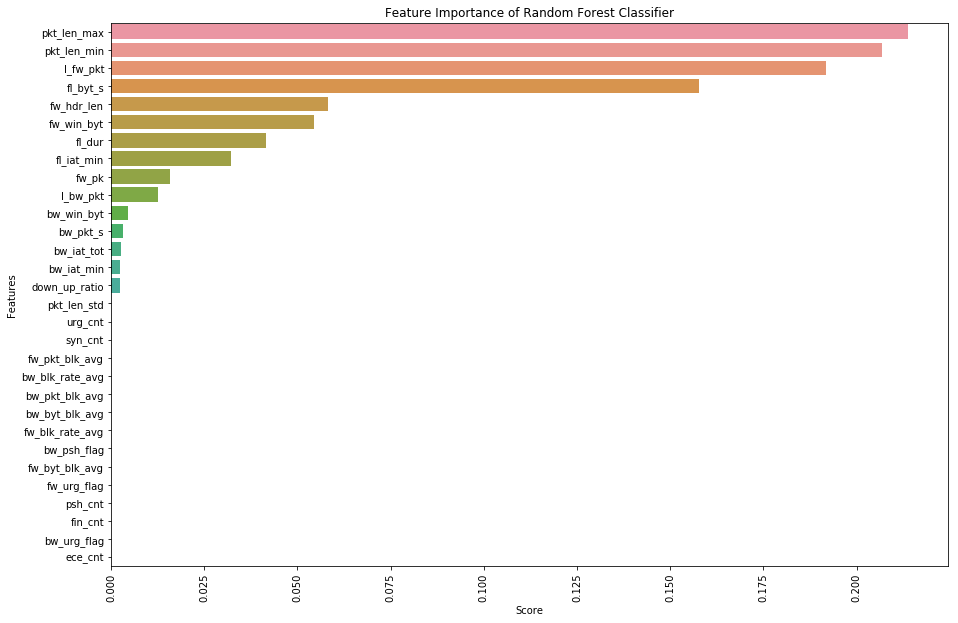

In [18]:
#Removing Id Featur
rfc = RandomForestClassifier(n_estimators=200, random_state=52)
pred = rfc.fit(X_train, y_train).predict(X_test)
print("Random Forest")
print(accuracy_score(y_test, pred)*100)
plt.figure(figsize=(15,10))
dn = {'features':X.columns, 'score':rfc.feature_importances_}
df = pd.DataFrame.from_dict(data=dn).sort_values(by='score', ascending=False)
plot = sns.barplot(x='score', y='features', data=df, orient='h')
plot.set(xlabel='Score', ylabel='Features', 
         title='Feature Importance of Random Forest Classifier')
plt.setp(plot.get_xticklabels(), rotation=90)
plt.savefig('Removing ID Feature.pdf')
plt.show()


In [36]:
#Removing ID Feature
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier
print("ADA")
xgb = AdaBoostClassifier(n_estimators=100, random_state=52)
xgb_pred = xgb.fit(X_train, y_train).predict(X_test)
print(accuracy_score(y_test,xgb_pred))
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,classification_report
dt = DecisionTreeClassifier(random_state=50)
print("Decision Tree Classifier Result")
DecisionTree=dt.fit(X_train, y_train).predict(X_test)
print(accuracy_score(y_test,DecisionTree))
from sklearn.svm import SVC
print("ETC")
b = ExtraTreesClassifier(n_estimators=100, random_state=52)
b_pred = b.fit(X_train, y_train).predict(X_test)
print(accuracy_score(y_test,b_pred))

from sklearn.naive_bayes import GaussianNB
print("Gaussian NB")
gnb = GaussianNB()
gnb_pred = gnb.fit(X_train, y_train).predict(X_test)
print(accuracy_score(y_test,gnb_pred))

from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
print("Logistic Regression Result")
logisticRegresion=lr.fit(X_train, y_train).predict(X_test)
print(accuracy_score(y_test,logisticRegresion))


#from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier
#from sklearn.linear_model import SGDClassifier
print("Voting Classifier LR+SGD")
clf2 = ExtraTreesClassifier(n_estimators=100, random_state=52)
clf1 = LogisticRegression()
eclf1 = VotingClassifier(estimators=[
        ('lr', clf1), ('ETC', clf2)],voting='hard')
predictionVC=eclf1.fit(X_train, y_train).predict(X_test)
print(accuracy_score(y_test,predictionVC))

ADA
0.5042175302561953
Decision Tree Classifier Result
0.8298056268664536
ETC
0.8307486771100749
Gaussian NB
0.385707549641117
Logistic Regression Result


C:\Users\Muhammad Umer\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

C:\Users\Muhammad Umer\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning:

Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.



0.23534342746371875
Voting Classifier LR+SGD


C:\Users\Muhammad Umer\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

C:\Users\Muhammad Umer\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning:

Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.



0.42536805155341334


In [20]:
#Removing ID Feature
print("DT")
print(classification_report(y_test,DecisionTree))
print("GNB")
print(classification_report(y_test,gnb_pred))
print("ETC")
print(classification_report(y_test,b_pred))
print("RFC")
print(classification_report(y_test,pred))
print("XGB")
print(classification_report(y_test,xgb_pred))
print("LR")
print(classification_report(y_test,logisticRegresion))
print("Voting Classifier")
print(classification_report(y_test,predictionVC))

DT
              precision    recall  f1-score   support

           0       0.76      0.86      0.81      3731
           1       1.00      1.00      1.00      4350
           2       0.68      0.76      0.72      4814
           3       0.98      0.98      0.98      4591
           4       0.64      0.36      0.47      3493
           5       0.62      0.84      0.71      4346
           6       1.00      1.00      1.00      4792
           7       1.00      1.00      1.00      4134
           8       0.74      0.54      0.62      3923

    accuracy                           0.83     38174
   macro avg       0.82      0.82      0.81     38174
weighted avg       0.83      0.83      0.82     38174

GNB


C:\Users\Muhammad Umer\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.

C:\Users\Muhammad Umer\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.

C:\Users\Muhammad Umer\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.



              precision    recall  f1-score   support

           0       0.31      0.69      0.42      3731
           1       1.00      0.01      0.02      4350
           2       0.52      0.81      0.63      4814
           3       0.53      0.08      0.13      4591
           4       0.00      0.00      0.00      3493
           5       0.46      0.82      0.59      4346
           6       0.86      0.04      0.08      4792
           7       0.31      0.99      0.48      4134
           8       0.01      0.00      0.00      3923

    accuracy                           0.39     38174
   macro avg       0.44      0.38      0.26     38174
weighted avg       0.47      0.39      0.27     38174

ETC
              precision    recall  f1-score   support

           0       0.76      0.86      0.81      3731
           1       1.00      1.00      1.00      4350
           2       0.68      0.76      0.72      4814
           3       0.97      0.99      0.98      4591
           4       0

C:\Users\Muhammad Umer\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.

C:\Users\Muhammad Umer\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.

C:\Users\Muhammad Umer\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.

C:\Users\Muhammad Umer\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.

C:\Users\Muhammad Umer\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning:

Precision and F-score are ill-de

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      3731
           1       1.00      1.00      1.00      4350
           2       0.00      0.00      0.00      4814
           3       0.95      0.64      0.77      4591
           4       0.37      1.00      0.54      3493
           5       0.20      0.00      0.00      4346
           6       1.00      1.00      1.00      4792
           7       0.00      0.00      0.00      4134
           8       0.30      0.93      0.45      3923

    accuracy                           0.50     38174
   macro avg       0.42      0.51      0.42     38174
weighted avg       0.44      0.50      0.43     38174

LR


C:\Users\Muhammad Umer\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.

C:\Users\Muhammad Umer\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.



              precision    recall  f1-score   support

           0       0.00      0.00      0.00      3731
           1       0.02      0.01      0.01      4350
           2       0.18      0.97      0.30      4814
           3       0.53      0.08      0.14      4591
           4       0.00      0.00      0.00      3493
           5       0.00      0.00      0.00      4346
           6       0.30      0.04      0.06      4792
           7       0.65      0.90      0.76      4134
           8       0.00      0.00      0.00      3923

    accuracy                           0.24     38174
   macro avg       0.19      0.22      0.14     38174
weighted avg       0.20      0.24      0.15     38174

Voting Classifier
              precision    recall  f1-score   support

           0       0.46      0.86      0.60      3731
           1       0.66      0.95      0.78      4350
           2       0.21      0.85      0.34      4814
           3       0.83      0.08      0.14      4591
      

C:\Users\Muhammad Umer\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.

C:\Users\Muhammad Umer\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.



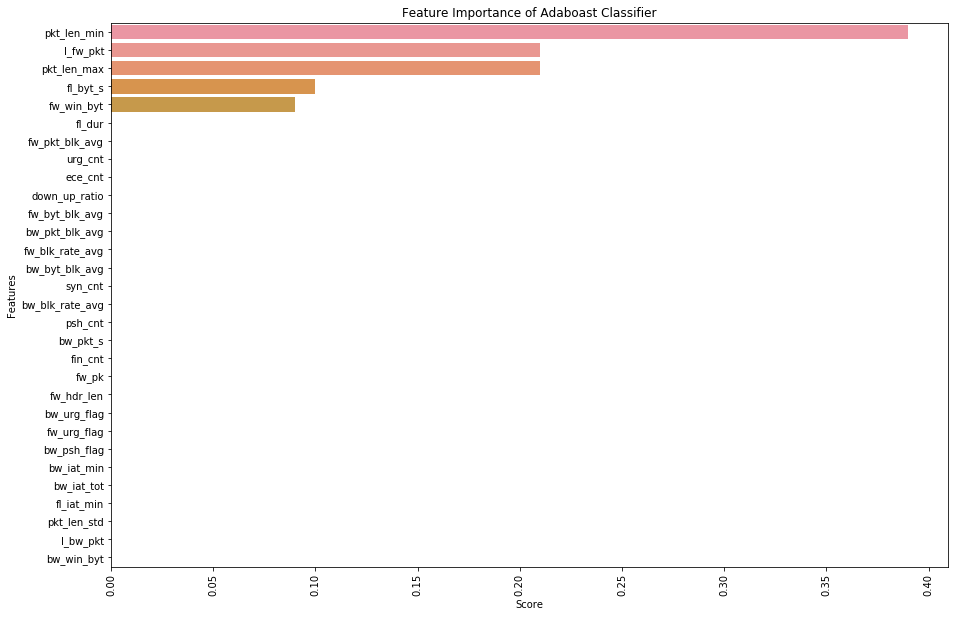

In [37]:
#Removing ID Feature
plt.figure(figsize=(15,10))
dn = {'features':X.columns, 'score':xgb.feature_importances_}
df = pd.DataFrame.from_dict(data=dn).sort_values(by='score', ascending=False)
plot = sns.barplot(x='score', y='features', data=df, orient='h')
plot.set(xlabel='Score', ylabel='Features', 
         title='Feature Importance of Adaboast Classifier')
plt.setp(plot.get_xticklabels(), rotation=90)
plt.savefig('Remiving ID Features XGB.pdf')
plt.show()

Random Forest
83.0748677110075


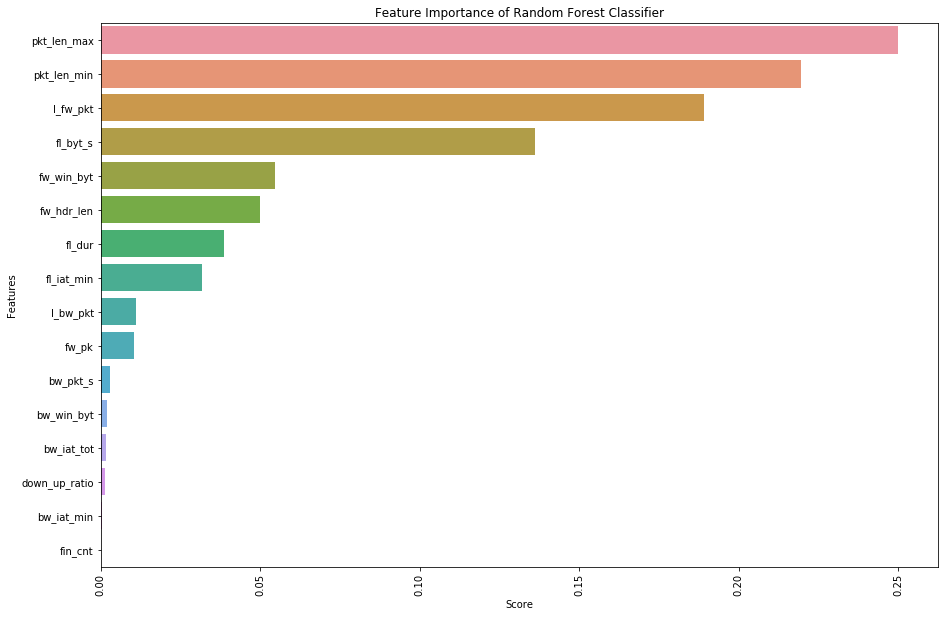

In [30]:
#Removing less significant Features
rfc = RandomForestClassifier(n_estimators=200, random_state=52)
pred = rfc.fit(X_train, y_train).predict(X_test)
print("Random Forest")
print(accuracy_score(y_test, pred)*100)
plt.figure(figsize=(15,10))
dn = {'features':X.columns, 'score':rfc.feature_importances_}
df = pd.DataFrame.from_dict(data=dn).sort_values(by='score', ascending=False)
plot = sns.barplot(x='score', y='features', data=df, orient='h')
plot.set(xlabel='Score', ylabel='Features', 
         title='Feature Importance of Random Forest Classifier')
plt.setp(plot.get_xticklabels(), rotation=90)
plt.savefig('Removing less significant Feature.pdf')
plt.show()


In [31]:
#Removing less significant Feature
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier
print("ADA")
xgb = AdaBoostClassifier(n_estimators=100, random_state=52)
xgb_pred = xgb.fit(X_train, y_train).predict(X_test)
print(accuracy_score(y_test,xgb_pred))
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,classification_report
dt = DecisionTreeClassifier(random_state=50)
print("Decision Tree Classifier Result")
DecisionTree=dt.fit(X_train, y_train).predict(X_test)
print(accuracy_score(y_test,DecisionTree))
from sklearn.svm import SVC
print("ETC")
b = ExtraTreesClassifier(n_estimators=100, random_state=52)
b_pred = b.fit(X_train, y_train).predict(X_test)
print(accuracy_score(y_test,b_pred))

from sklearn.naive_bayes import GaussianNB
print("Gaussian NB")
gnb = GaussianNB()
gnb_pred = gnb.fit(X_train, y_train).predict(X_test)
print(accuracy_score(y_test,gnb_pred))

from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
print("Logistic Regression Result")
logisticRegresion=lr.fit(X_train, y_train).predict(X_test)
print(accuracy_score(y_test,logisticRegresion))


#from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier
#from sklearn.linear_model import SGDClassifier
print("Voting Classifier LR+SGD")
clf2 = ExtraTreesClassifier(n_estimators=100, random_state=52)
clf1 = LogisticRegression()
eclf1 = VotingClassifier(estimators=[
        ('lr', clf1), ('ETC', clf2)],voting='hard')
predictionVC=eclf1.fit(X_train, y_train).predict(X_test)
print(accuracy_score(y_test,predictionVC))

ADA
0.5870749724943679
Decision Tree Classifier Result
0.8298056268664536
ETC
0.8311154188714832
Gaussian NB
0.385707549641117
Logistic Regression Result


C:\Users\Muhammad Umer\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

C:\Users\Muhammad Umer\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning:

Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.



0.23534342746371875
Voting Classifier LR+SGD


C:\Users\Muhammad Umer\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

C:\Users\Muhammad Umer\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning:

Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.



0.4255514224341175


In [32]:
#Removing less significant Feature
print("DT")
print(classification_report(y_test,DecisionTree))
print("GNB")
print(classification_report(y_test,gnb_pred))
print("ETC")
print(classification_report(y_test,b_pred))
print("RFC")
print(classification_report(y_test,pred))
print("XGB")
print(classification_report(y_test,xgb_pred))
print("LR")
print(classification_report(y_test,logisticRegresion))
print("Voting Classifier")
print(classification_report(y_test,predictionVC))

DT
              precision    recall  f1-score   support

           0       0.76      0.86      0.81      3731
           1       1.00      1.00      1.00      4350
           2       0.68      0.76      0.72      4814
           3       0.98      0.98      0.98      4591
           4       0.65      0.36      0.47      3493
           5       0.62      0.84      0.71      4346
           6       1.00      1.00      1.00      4792
           7       1.00      1.00      1.00      4134
           8       0.74      0.54      0.62      3923

    accuracy                           0.83     38174
   macro avg       0.83      0.82      0.81     38174
weighted avg       0.83      0.83      0.82     38174

GNB
              precision    recall  f1-score   support

           0       0.31      0.69      0.42      3731
           1       1.00      0.01      0.02      4350
           2       0.52      0.81      0.63      4814
           3       0.53      0.08      0.13      4591
           4     

C:\Users\Muhammad Umer\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.

C:\Users\Muhammad Umer\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.

C:\Users\Muhammad Umer\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.



              precision    recall  f1-score   support

           0       0.76      0.86      0.81      3731
           1       1.00      1.00      1.00      4350
           2       0.68      0.76      0.72      4814
           3       0.98      0.99      0.98      4591
           4       0.65      0.36      0.47      3493
           5       0.62      0.84      0.72      4346
           6       1.00      1.00      1.00      4792
           7       1.00      1.00      1.00      4134
           8       0.75      0.54      0.63      3923

    accuracy                           0.83     38174
   macro avg       0.83      0.82      0.81     38174
weighted avg       0.83      0.83      0.82     38174

RFC
              precision    recall  f1-score   support

           0       0.76      0.87      0.81      3731
           1       1.00      1.00      1.00      4350
           2       0.69      0.75      0.72      4814
           3       0.97      0.99      0.98      4591
           4       0

C:\Users\Muhammad Umer\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.

C:\Users\Muhammad Umer\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.

C:\Users\Muhammad Umer\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.

C:\Users\Muhammad Umer\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.

C:\Users\Muhammad Umer\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning:

Precision and F-score are ill-de

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      3731
           1       0.71      1.00      0.83      4350
           2       0.39      1.00      0.56      4814
           3       0.00      0.00      0.00      4591
           4       0.00      0.00      0.00      3493
           5       0.40      1.00      0.58      4346
           6       1.00      1.00      1.00      4792
           7       1.00      1.00      1.00      4134
           8       0.00      0.00      0.00      3923

    accuracy                           0.59     38174
   macro avg       0.39      0.55      0.44     38174
weighted avg       0.41      0.59      0.46     38174

LR


C:\Users\Muhammad Umer\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.

C:\Users\Muhammad Umer\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.



              precision    recall  f1-score   support

           0       0.00      0.00      0.00      3731
           1       0.02      0.01      0.01      4350
           2       0.18      0.97      0.30      4814
           3       0.53      0.08      0.14      4591
           4       0.00      0.00      0.00      3493
           5       0.00      0.00      0.00      4346
           6       0.30      0.04      0.06      4792
           7       0.65      0.90      0.76      4134
           8       0.00      0.00      0.00      3923

    accuracy                           0.24     38174
   macro avg       0.19      0.22      0.14     38174
weighted avg       0.20      0.24      0.15     38174

Voting Classifier
              precision    recall  f1-score   support

           0       0.46      0.86      0.60      3731
           1       0.66      0.95      0.78      4350
           2       0.21      0.85      0.34      4814
           3       0.83      0.08      0.15      4591
      

C:\Users\Muhammad Umer\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.

C:\Users\Muhammad Umer\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.



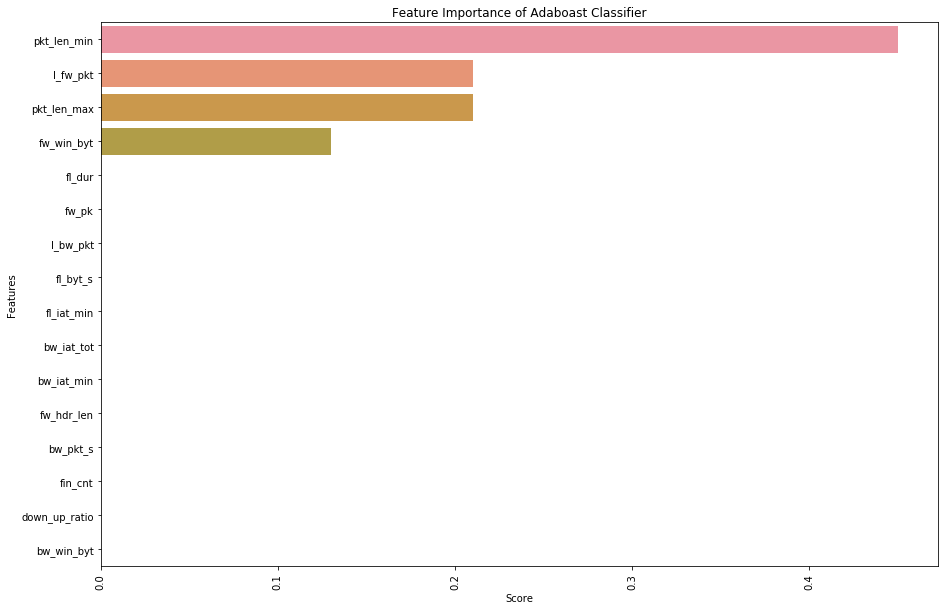

In [33]:
#Removing less significant Feature
plt.figure(figsize=(15,10))
dn = {'features':X.columns, 'score':xgb.feature_importances_}
df = pd.DataFrame.from_dict(data=dn).sort_values(by='score', ascending=False)
plot = sns.barplot(x='score', y='features', data=df, orient='h')
plot.set(xlabel='Score', ylabel='Features', 
         title='Feature Importance of Adaboast Classifier')
plt.setp(plot.get_xticklabels(), rotation=90)
plt.savefig('Removing less significant Features XGB.pdf')
plt.show()